In [1]:
from metrics import PerSNMetric
from efficiencyTable import EfficiencyTable

/usr/local/manual/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
from OpSimSummary import summarize_opsim as oss

In [3]:
import pandas as pd
import sncosmo

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt
import os
import numpy as np
import copy

In [5]:
from lsst.sims.photUtils import BandpassDict

## Setup : Bandpasses

In [6]:
# Catsim bandpasses
lsst_bp = BandpassDict.loadTotalBandpassesFromFiles()

In [7]:
# sncosmo Bandpasses required for fitting
throughputsdir = os.getenv('THROUGHPUTS_DIR')

from astropy.units import Unit
bandPassList = ['u', 'g', 'r', 'i', 'z', 'y']
banddir = os.path.join(os.getenv('THROUGHPUTS_DIR'), 'baseline')

for band in bandPassList:

    # setup sncosmo bandpasses
    bandfname = banddir + "/total_" + band + '.dat'


    # register the LSST bands to the SNCosmo registry
    # Not needed for LSST, but useful to compare independent codes
    # Usually the next two lines can be merged,
    # but there is an astropy bug currently which affects only OSX.
    numpyband = np.loadtxt(bandfname)
    print band
    sncosmoband = sncosmo.Bandpass(wave=numpyband[:, 0],
                                   trans=numpyband[:, 1],
                                   wave_unit=Unit('nm'),
                                   name=band)
    sncosmo.registry.register(sncosmoband, force=True)

u
g
r
i
z
y


In [8]:
et = EfficiencyTable.fromDES_EfficiencyFile('example_data/SEARCHEFF_PIPELINE_DES.DAT')

In [9]:
from lsst.sims.catUtils.mixins import SNObject

In [10]:
opsimHDF = os.path.join(os.getenv('HOME'), 'data', 'LSST', 'OpSimData', 'storage.h5')
summarydf = pd.read_hdf(opsimHDF, 'table')
# df = df.query('propID == [364, 366]')

In [11]:
summarydf = summarydf.query('propID == [364, 366]').query('night < 300')

In [12]:
summarydf.head()

,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec,gamma,N0sq,alpha
0,1,1189,364,316,1.676483,-1.082473,y,2771,49353.032079,0,...,0,0,1.620307,0.000000,21.084291,1.643930,-1.108924,0.039924,0.000002,0.039924
1,2,1189,364,372,1.694120,-1.033972,y,2810,49353.032525,0,...,0,0,0.049266,4.542362,21.088257,1.664257,-1.060423,0.039924,0.000002,0.039924
2,3,1189,364,441,1.708513,-0.985271,y,2848,49353.032971,0,...,0,0,0.049298,4.561422,21.091100,1.680878,-1.011722,0.039924,0.000002,0.039924
3,4,1189,364,505,1.720374,-0.936476,y,2887,49353.033417,0,...,0,0,0.049266,4.570186,21.092714,1.694604,-0.962927,0.039924,0.000002,0.039924
4,5,1189,364,587,1.730248,-0.887672,y,2925,49353.033864,0,...,0,0,0.049177,4.568530,21.093091,1.706054,-0.914123,0.039924,0.000002,0.039924


In [13]:
qm_309 = PerSNMetric(fieldID=309, t0=49540, summarydf=summarydf, lsst_bp=lsst_bp, efficiency=et)

In [14]:
#qm_309.qualityMetric()

qm_309.lightcurve.columns

In [15]:
x = qm_309.discoveryMetric()

In [16]:
print (x)

0.999951379462


In [17]:
np.log(x)

-4.8621720267626623e-05

In [18]:
np.log(2)

0.69314718055994529

In [19]:
np.log(np.array([10., 2]))

array([ 2.30258509,  0.69314718])

In [20]:
1000 * 34 /24. / 60. / 60.

0.3935185185185185

In [22]:
so = oss.SummaryOpsim(summarydf)

In [23]:
f = so.fieldIds

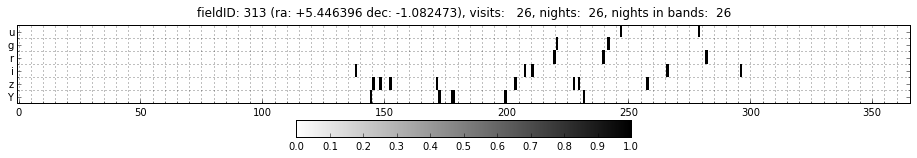

In [33]:
_ = so.cadence_plot(f[5], observedOnly=True)